# Circos plot of cancer genomics 

This notebook follows closely to [this online tutorial](https://training.galaxyproject.org/training-material/topics/visualisation/tutorials/circos/tutorial.html#example-cancer-genomics).  The datasets are available [here](https://zenodo.org/record/4494146/#.Y0cinnbMIQg) and should be downloaded into the ```data``` directory (which you may have to create).


*Note:* this Jupyter notebook was converted to an R markdown file and then an html file using the following commands in R :

```
rmarkdown::convert_ipynb('circos_r.ipynb')
rmarkdown::render('circos_r.Rmd')
```

___
*Author : Aaron M Geller, Oct. 2022*

# NOTE: add RCircos to installation instructions
RCircos docs : 
- https://cran.r-project.org/web/packages/RCircos/vignettes/Using_RCircos.pdf, 
- https://cran.r-project.org/web/packages/RCircos/RCircos.pdf
- https://mrcuizhe.github.io/interacCircos_documentation/html/users_from_rcircos.html
- https://www.rdocumentation.org/packages/RCircos/versions/1.2.2/topics/RCircos.Link.Plot

In [ ]:
# Run this cell to create the data directory and download the sample data.
# On subsequent runs of this notebook, you can skip this step

directory = file.path(getwd(), 'data')
dir.create(directory)

download.file('https://zenodo.org/record/4494146/files/VCaP_Copy-Number.tsv?download=1', 
    file.path(directory, 'VCaP_Copy-Number.tsv'))
download.file('https://zenodo.org/record/4494146/files/VCaP_B-allele-Frequency.tsv?download=1', 
    file.path(directory, 'VCaP_B-allele-Frequency.tsv'))
download.file('https://zenodo.org/record/4494146/files/VCaP-highConfidenceJunctions.tsv?download=1', 
    file.path(directory, 'VCaP-highConfidenceJunctions.tsv'))
download.file('https://zenodo.org/record/4494146/files/hg18_karyotype_withbands.txt?download=1', 
    file.path(directory, 'hg18_karyotype_withbands.txt'))

In [1]:
library(RCircos)
library(stringr)

In [5]:
# read in the data and define the columns
# skip extra rows at the top that are not useful here
dfChrom <- read.table('data/hg18_karyotype_withbands.txt', sep = "" , header = FALSE, skip = 24)
colnames(dfChrom) <- c('','chromosome','band','','chromStart','chromEnd','Stain')

# reorder to columns for RCircos (and drop a few that are unnecessary)
dfChrom <- dfChrom[, c(2, 5, 6, 3, 7)]

# create a column with the chromosome number or string for sorting
dfChrom$chromosomeID <- gsub("chr","",as.character(dfChrom$chromosome))

# sort by chromosomeID
dfChrom <- dfChrom[str_order(dfChrom$chromosomeID, numeric = TRUE),]

head(dfChrom)

,chromosome,chromStart,chromEnd,band,Stain,chromosomeID
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,chr1,0,2300000,p36.33,gneg,1
2,chr1,2300000,5300000,p36.32,gpos25,1
3,chr1,5300000,7100000,p36.31,gneg,1
4,chr1,7100000,9200000,p36.23,gpos25,1
5,chr1,9200000,12600000,p36.22,gneg,1
6,chr1,12600000,16100000,p36.21,gpos50,1



RCircos.Core.Components initialized.
Type ?RCircos.Reset.Plot.Parameters to see how to modify the core components.





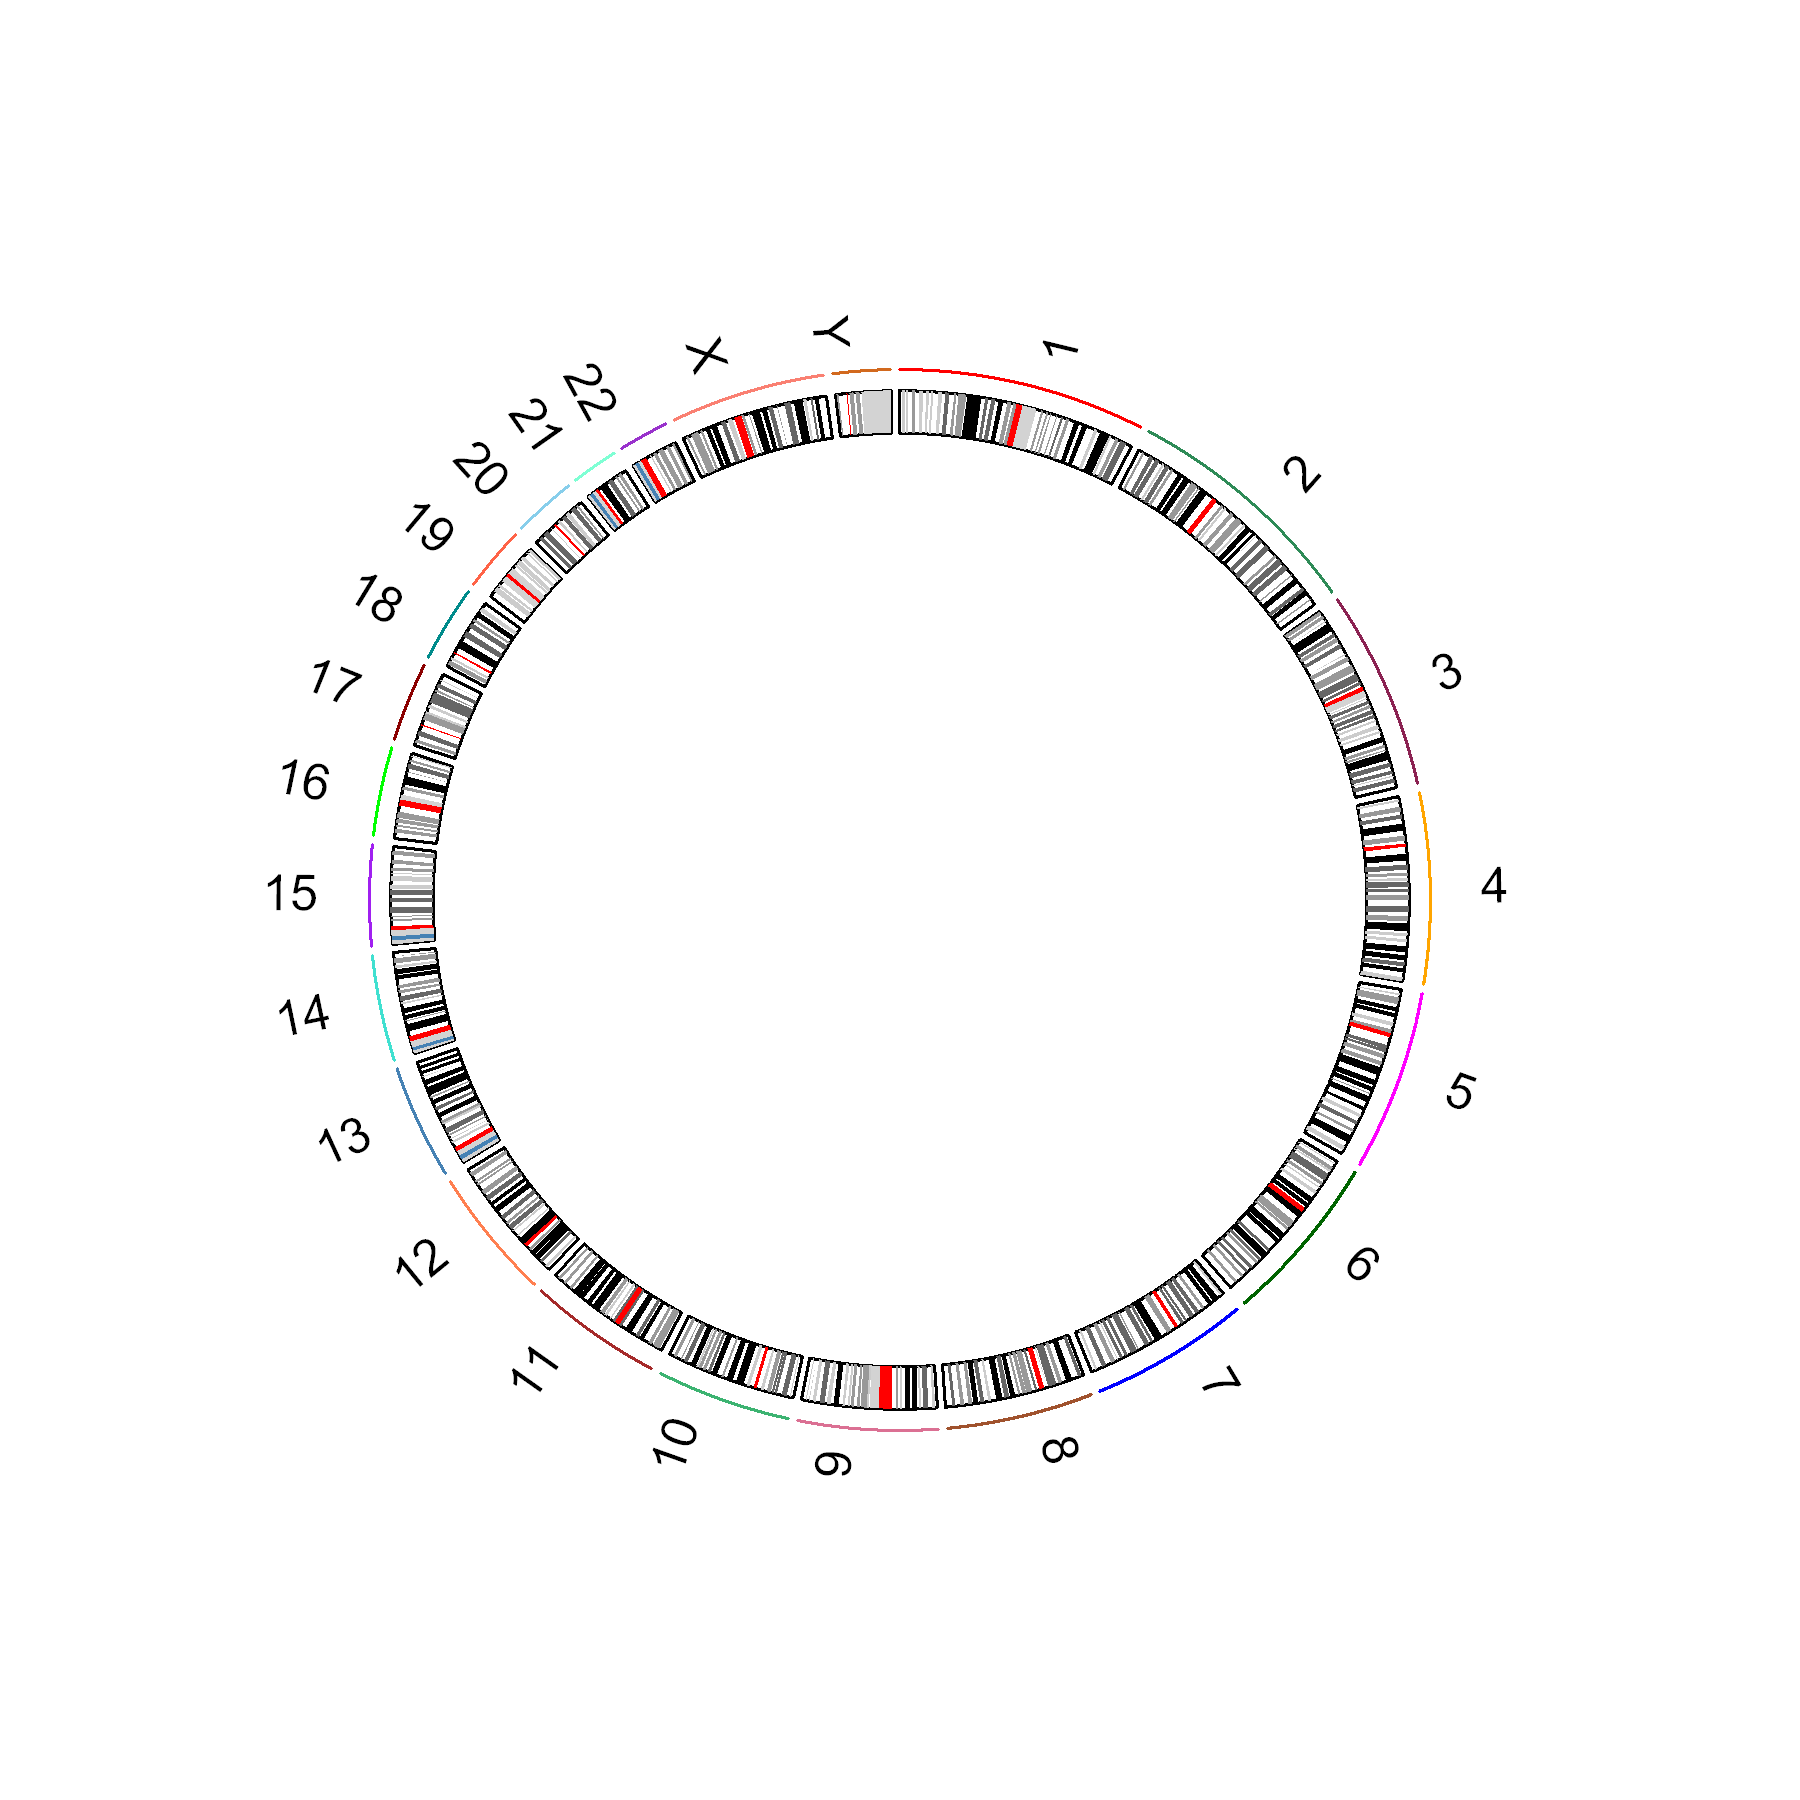

In [6]:
# for displaying in Jupyter
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# add the data to RCircos
RCircos.Set.Core.Components(cyto.info = dfChrom, chr.exclude = NULL, tracks.inside = 4, tracks.outside = 0)
RCircos.Set.Plot.Area()
RCircos.Chromosome.Ideogram.Plot() 

In [41]:
# read in the copy number variation (CNV) data and fix the column names
dfCNV <- read.table('data/VCaP_Copy-Number.tsv', header = TRUE)
colnames(dfCNV) <- c('chromosome','start','stop','value','')

# drop the unnecessary last column
dfCNV <- dfCNV[, c(1, 2, 3, 4)]

# remove any extra chromosomes that are not in the ideogram
extras <- c('chrMT')
dfCNV <- subset(dfCNV, !(chromosome %in% extras))

# create a column with the chromosome number or string for sorting
dfCNV$chromosomeID <- gsub("chr","",as.character(dfCNV$chromosome))

# randomly select 25000 lines (otherwise the plot is too full and takes too long to create)
dfCNV <- dfCNV[sample(nrow(dfCNV), 25000), ]

# sort by chromosomeID
dfCNV <- dfCNV[str_order(dfCNV$chromosomeID, numeric = TRUE),]

# limit the data values so they don't go outside of the plot
dfCNV <- subset(dfCNV, (value >= -1))
dfCNV <- subset(dfCNV, (value <= 1))


head(dfCNV)

,chromosome,start,stop,value,chromosomeID
,<chr>,<int>,<int>,<dbl>,<chr>
41386,chr1,93893230,93893230,-0.13610970,1
16675,chr1,35659075,35659075,0.11758530,1
41845,chr1,94702933,94702933,0.13117540,1
5455,chr1,11783863,11783863,-0.23648260,1
45949,chr1,103941535,103941535,-0.18814050,1
21935,chr1,47289710,47289710,0.01912142,1



RCircos.Core.Components initialized.
Type ?RCircos.Reset.Plot.Parameters to see how to modify the core components.





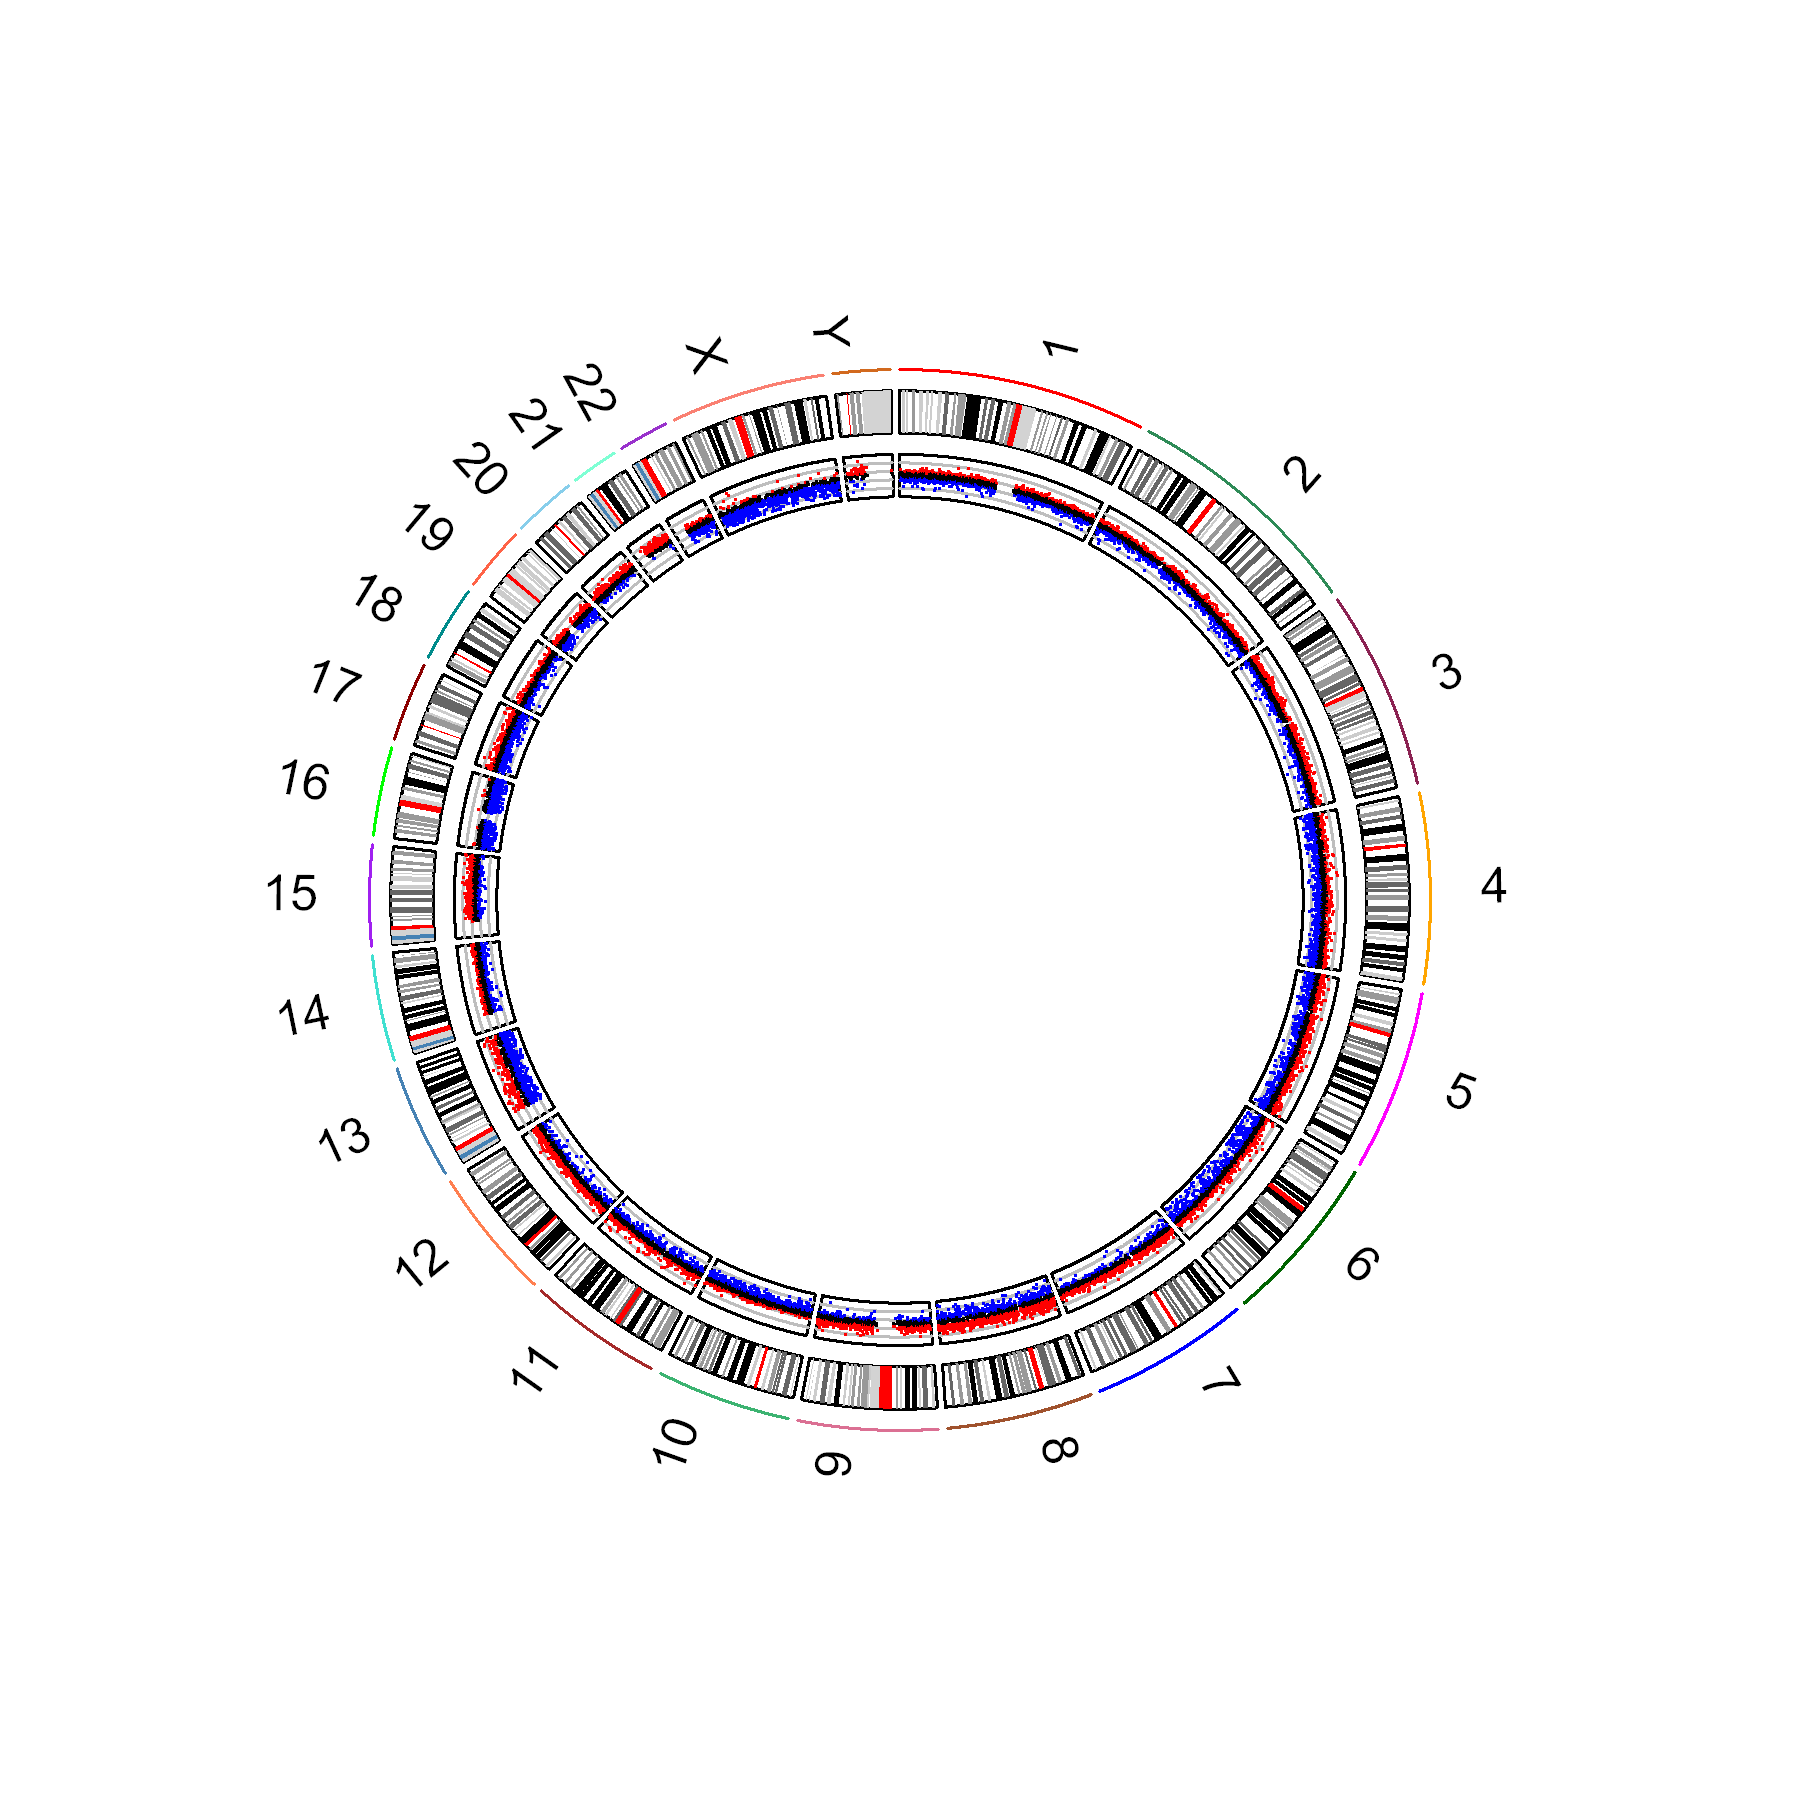

In [42]:
# for displaying in Jupyter
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# add the data to RCircos
RCircos.Set.Core.Components(cyto.info = dfChrom, chr.exclude = NULL, tracks.inside = 4, tracks.outside = 0)
params <- RCircos.Get.Plot.Parameters()
params$track.background <- "white"
RCircos.Reset.Plot.Parameters(params)
RCircos.Set.Plot.Area()
RCircos.Chromosome.Ideogram.Plot() 
RCircos.Scatter.Plot(dfCNV, data.col = 4, track.num = 1, side = 'in', by.fold = 0.15, min.value = -1, max.value = 1)


In [43]:
# read in the B-allel frequency (BAF) data and fix the column names
dfBAF <- read.table('data/VCaP_B-allele-Frequency.tsv', header = TRUE)
colnames(dfBAF) <- c('chromosome','start','stop','value')

# remove any extra chromosomes that are not in the ideogram
extras <- c('chrMT')
dfBAF <- subset(dfBAF, !(chromosome %in% extras))

# create a column with the chromosome number or string for sorting
dfBAF$chromosomeID <- gsub("chr","",as.character(dfBAF$chromosome))

# randomly select 25000 lines (otherwise the plot is too full and takes too long to create)
dfBAF <- dfBAF[sample(nrow(dfBAF), 25000), ]

# sort by chromosomeID
dfBAF <- dfBAF[str_order(dfBAF$chromosomeID, numeric = TRUE),]

head(dfBAF)

,chromosome,start,stop,value,chromosomeID
,<chr>,<int>,<int>,<dbl>,<chr>
52298,chr1,118661127,118661127,0.6932521,1
35458,chr1,79319105,79319105,0.0000000,1
62703,chr1,164724784,164724784,0.6269420,1
66607,chr1,172310899,172310899,0.0000000,1
7217,chr1,15669301,15669301,1.0000000,1
44129,chr1,99294602,99294602,0.3418793,1



RCircos.Core.Components initialized.
Type ?RCircos.Reset.Plot.Parameters to see how to modify the core components.





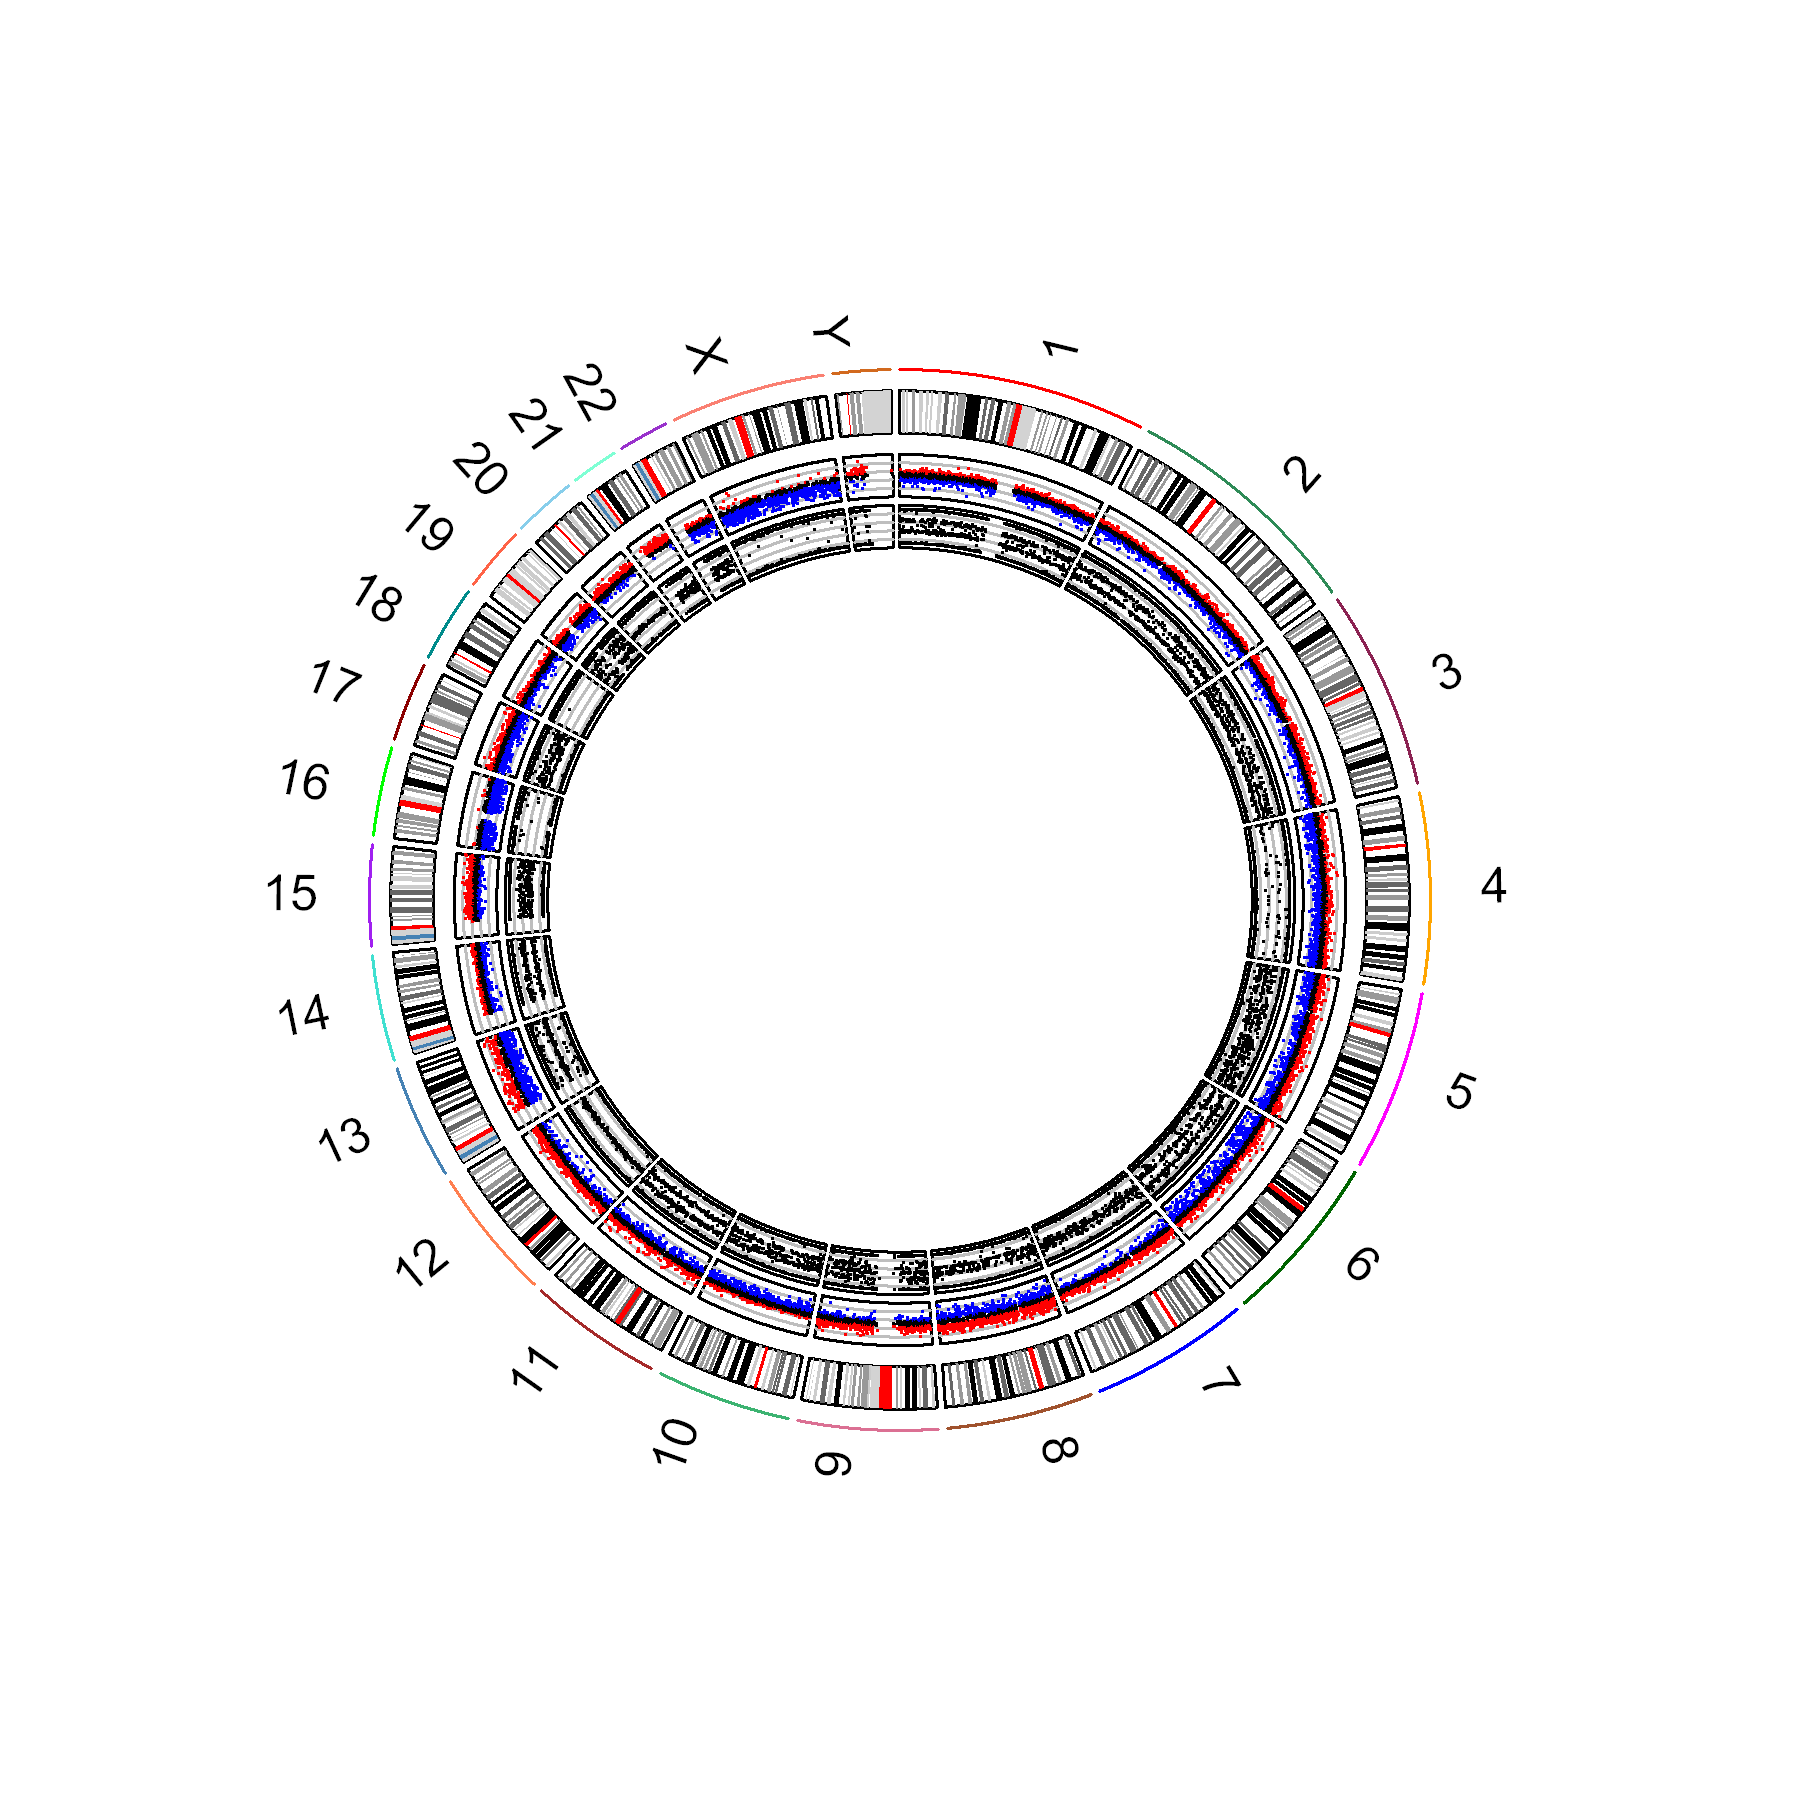

In [44]:
# for displaying in Jupyter
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# add the data to RCircos
RCircos.Set.Core.Components(cyto.info = dfChrom, chr.exclude = NULL, tracks.inside = 4, tracks.outside = 0)
params <- RCircos.Get.Plot.Parameters()
params$track.background <- "white"
RCircos.Reset.Plot.Parameters(params)
RCircos.Set.Plot.Area()
RCircos.Chromosome.Ideogram.Plot() 
RCircos.Scatter.Plot(dfCNV, data.col = 4, track.num = 1, side = 'in', by.fold = 0.15, min.value = -1, max.value = 1)
RCircos.Scatter.Plot(dfBAF, data.col = 4, track.num = 2, side = 'in', min.value = 0, max.value = 1)

In [45]:
# so that I can use fread to deal with rows of differing number of columns
library(data.table)

In [46]:
# I need a way to process this file to remove the extra columns before reading in?
# read in the junctions data and fix the column names
dfLinks <- fread('data/VCaP-highConfidenceJunctions.tsv', header = TRUE, skip = 11)

# select the necessary columns
dfLinks <- dfLinks[, c(2, 3, 3, 6, 7, 7)]

colnames(dfLinks) <- c('chromosome','chromStart','chromEnd','chromosome.1','chromStart.1','chromEnd.1')

# remove any extra chromosomes that are not in the ideogram
extras <- c('chrMT')
dfLinks <- subset(dfLinks, !(chromosome %in% extras))
dfLinks <- subset(dfLinks, !(chromosome.1 %in% extras))

# only use links that go between different chromosomes
dfLinks <- subset(dfLinks, (chromosome != chromosome.1))

# set the color for each line (in this case all black)
dfLinks$PlotColor <- "black"

head(dfLinks)

chromosome,chromStart,chromEnd,chromosome.1,chromStart.1,chromEnd.1,PlotColor
<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>
chr1,8706415,8706415,chr8,145491742,145491742,black
chr1,8706521,8706521,chr3,23338239,23338239,black
chr1,8707439,8707439,chr3,23338260,23338260,black
chr1,154452854,154452854,chr8,47059554,47059554,black
chr2,9841660,9841660,chr15,56972851,56972851,black
chr2,9849353,9849353,chr14,73460747,73460747,black



RCircos.Core.Components initialized.
Type ?RCircos.Reset.Plot.Parameters to see how to modify the core components.





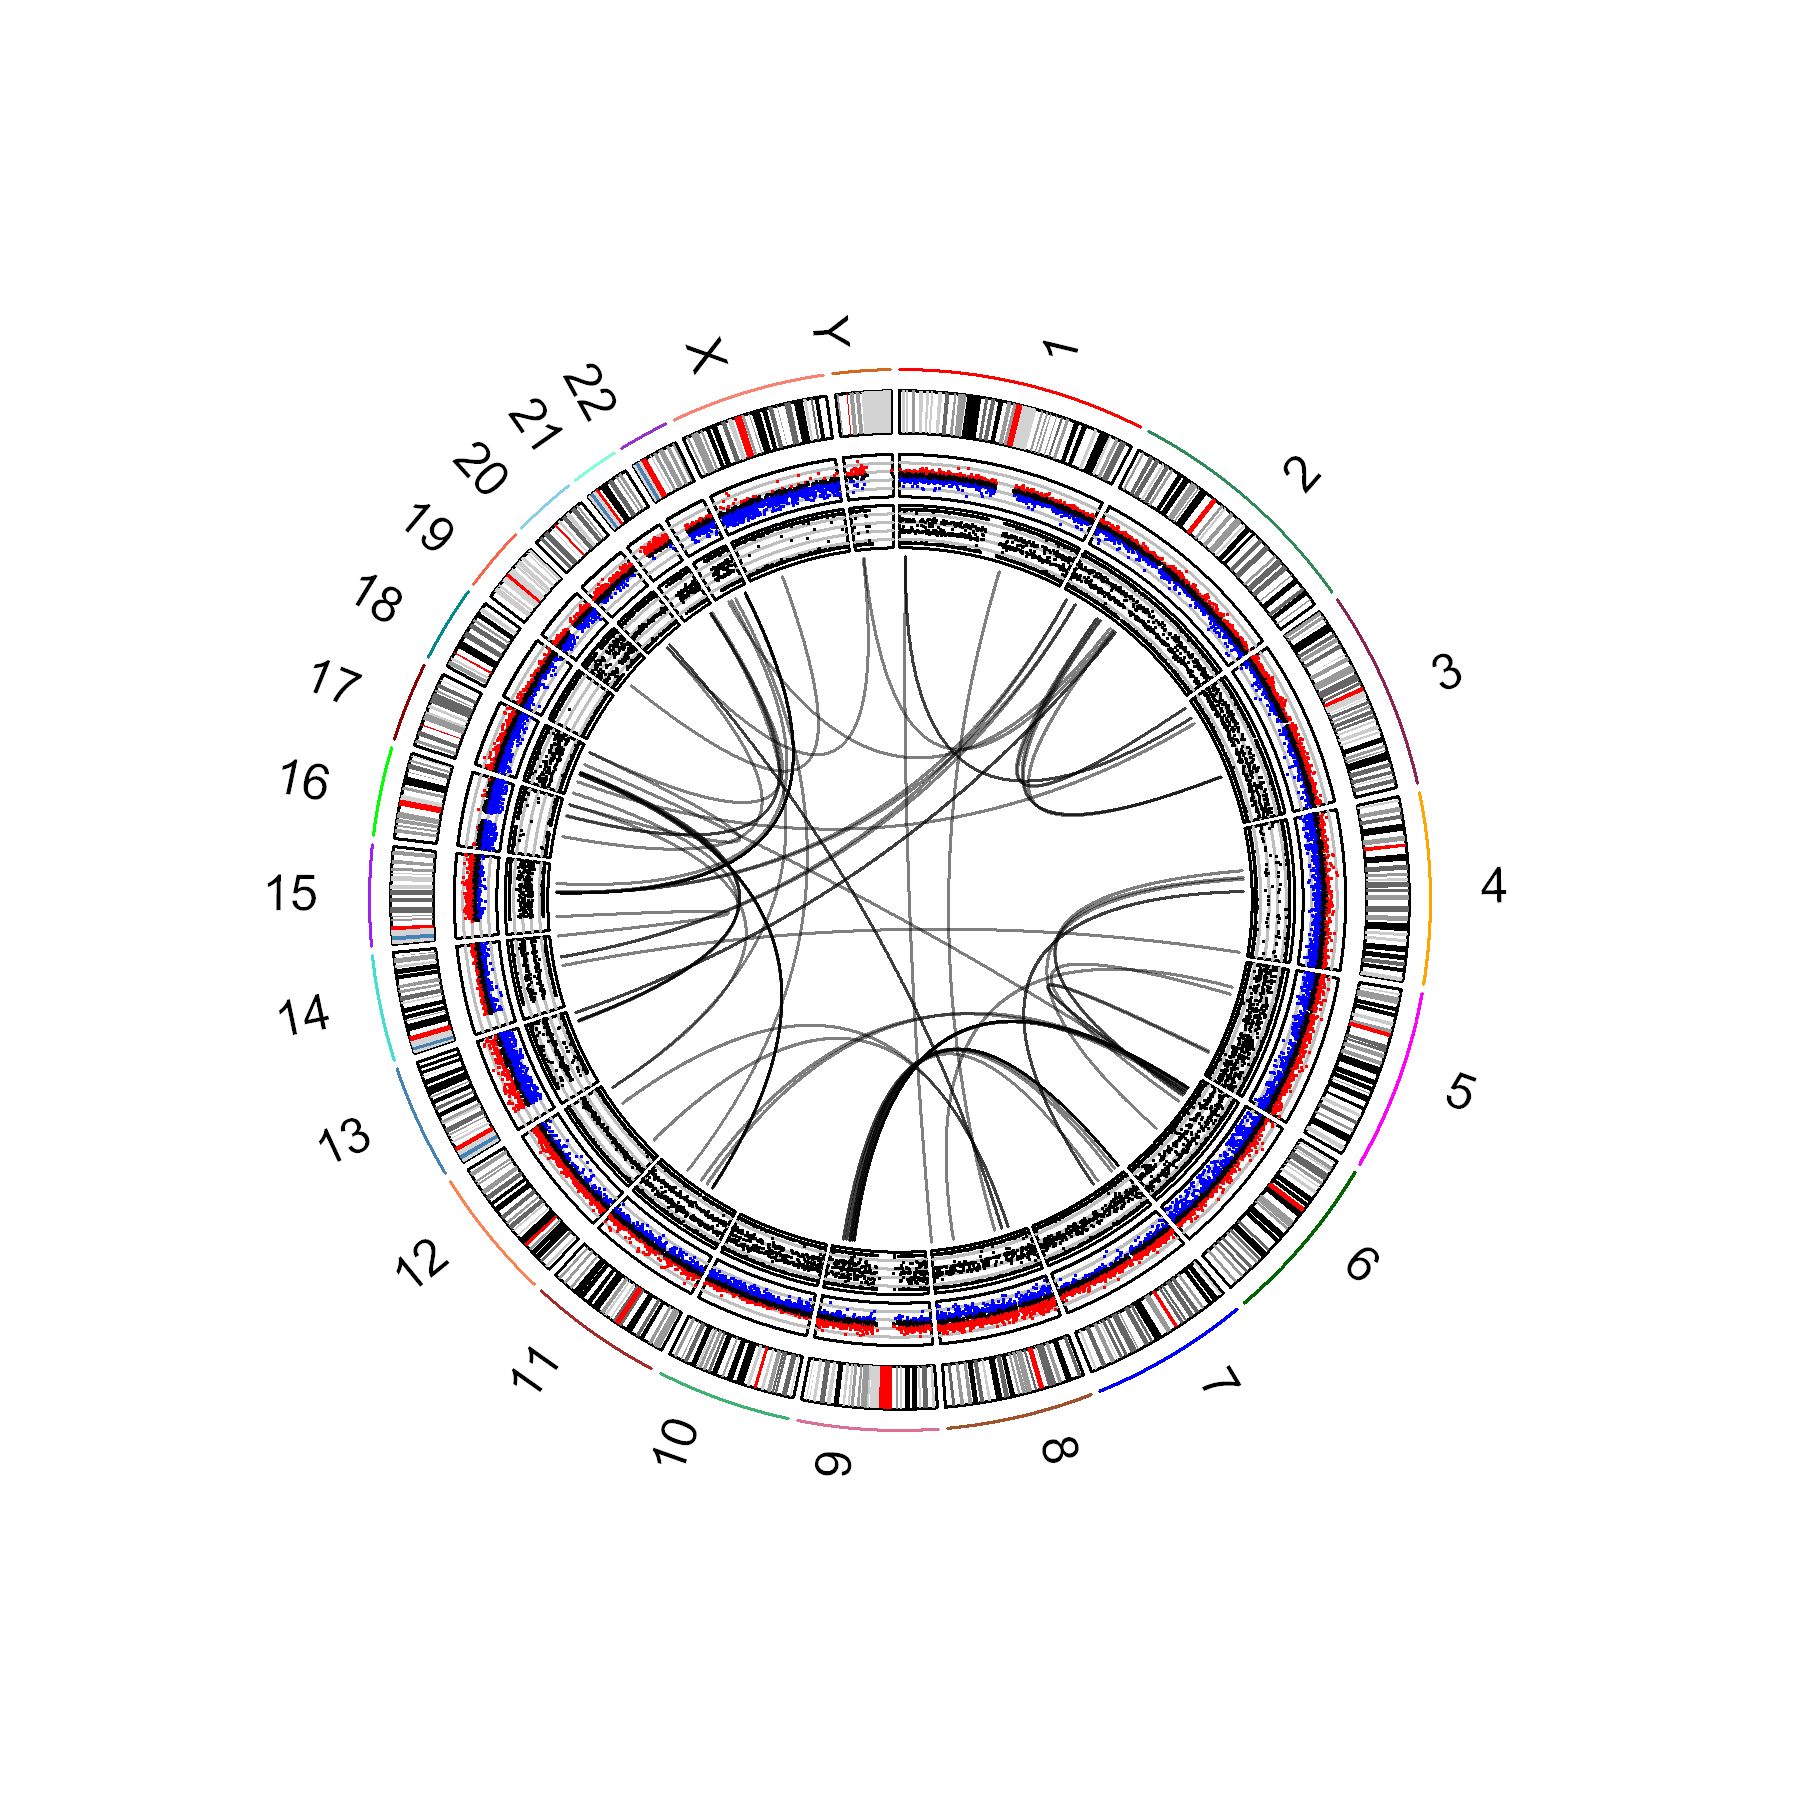

In [47]:
# for displaying in Jupyter
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# add the data to RCircos
RCircos.Set.Core.Components(cyto.info = dfChrom, chr.exclude = NULL, tracks.inside = 4, tracks.outside = 0)
params <- RCircos.Get.Plot.Parameters()
params$track.background <- "white"
RCircos.Reset.Plot.Parameters(params)
RCircos.Set.Plot.Area()
RCircos.Chromosome.Ideogram.Plot() 
RCircos.Scatter.Plot(dfCNV, data.col = 4, track.num = 1, side = 'in', by.fold = 0.15, min.value = -1, max.value = 1)
RCircos.Scatter.Plot(dfBAF, data.col = 4, track.num = 2, side = 'in', min.value = 0, max.value = 1)
RCircos.Link.Plot(dfLinks, track.num = 3, by.chromosome = FALSE)